In [61]:
# importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore")

In [83]:
# reading the given dataset
train_data = pd.read_csv("training_data.csv")
td = train_data.copy()
train_data.shape

(4500, 96)

In [63]:
fake_pub_data = pd.read_csv("public_fake_test_data.csv")
fake_pub_data.head(2)

,times,Series1,Series2,Series3,Series4,Series5,Series6,Series7,Series8,Series9,...,Series86,Series87,Series88,Series89,Series90,Series91,Series92,Series93,Series94,Series95
0,1991-02-26,221.906904,209.384404,212.940469,210.951168,200.843305,215.455393,203.517218,214.127919,226.265642,...,213.984178,209.19355,206.859867,216.48676,213.265123,221.629532,217.60735,227.577026,211.2203,224.895289
1,1991-02-27,221.906904,209.384404,212.940469,210.951168,200.843305,215.455393,203.517218,214.127919,226.265642,...,213.984178,209.19355,206.859867,216.48676,213.265123,221.629532,217.60735,227.577026,211.2203,224.895289


#### Appending train and test dataset

In [69]:
td1 = td.append(fake_pub_data)
td1.shape

(5301, 96)

In [65]:
def basic_data_understanding(data):
    min_date = data['times'].min()
    max_date = data['times'].max()
    data_info = data.info()
    print("Min Date:", min_date, "|| Max Date:", max_date, "\nData info:\n", data_info)
#     return "Min"min_date, max_date, data_type, check_null

In [70]:
basic_data_understanding(td1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5301 entries, 0 to 800
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     5301 non-null   object 
 1   Series1   5301 non-null   float64
 2   Series2   5301 non-null   float64
 3   Series3   5301 non-null   float64
 4   Series4   5301 non-null   float64
 5   Series5   5301 non-null   float64
 6   Series6   5301 non-null   float64
 7   Series7   5301 non-null   float64
 8   Series8   5301 non-null   float64
 9   Series9   5301 non-null   float64
 10  Series10  5301 non-null   float64
 11  Series11  5301 non-null   float64
 12  Series12  5301 non-null   float64
 13  Series13  5301 non-null   float64
 14  Series14  5301 non-null   float64
 15  Series15  5301 non-null   float64
 16  Series16  5301 non-null   float64
 17  Series17  5301 non-null   float64
 18  Series18  5301 non-null   float64
 19  Series19  5301 non-null   float64
 20  Series20  5301 non-null   float

### Converting object to timestamp

In [71]:
def convert_timestamp(data):
    if data.dtypes['times'] == object:
        data['times'] = pd.to_datetime(data.times)
        return data 
    else:
        return data

In [72]:
basic_data_understanding(convert_timestamp(td1))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5301 entries, 0 to 800
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   times     5301 non-null   datetime64[ns]
 1   Series1   5301 non-null   float64       
 2   Series2   5301 non-null   float64       
 3   Series3   5301 non-null   float64       
 4   Series4   5301 non-null   float64       
 5   Series5   5301 non-null   float64       
 6   Series6   5301 non-null   float64       
 7   Series7   5301 non-null   float64       
 8   Series8   5301 non-null   float64       
 9   Series9   5301 non-null   float64       
 10  Series10  5301 non-null   float64       
 11  Series11  5301 non-null   float64       
 12  Series12  5301 non-null   float64       
 13  Series13  5301 non-null   float64       
 14  Series14  5301 non-null   float64       
 15  Series15  5301 non-null   float64       
 16  Series16  5301 non-null   float64       
 17  Series17  5301 

### Data basic understanding

**Train Data:** \
-- Min Date: 1978-11-01 00:00:00 || Max Date: 1991-02-25 00:00:00 \
-- Total records: 4500 entries\
-- No missing values in any of the records

**fake_pub_data:** \
-- Min Date: 1991-02-26 || Max Date: 1993-05-06 \
-- Total records: 801 entries\
-- No missing values in any of the records

### Setting time object as index

In [76]:
train_data1 = td1[["times", "Series1"]]
train_data2 = train_data1.set_index("times")
print("Series Min value: ",train_data2['Series1'].min(), " Series Max value: " ,train_data2['Series1'].max())
train_data2.tail(5)

Series Min value:  48.6518445271979  Series Max value:  6245.29634678933


,Series1
times,
1993-05-02,221.906904
1993-05-03,221.906904
1993-05-04,221.906904
1993-05-05,221.906904
1993-05-06,221.906904


### Visualization

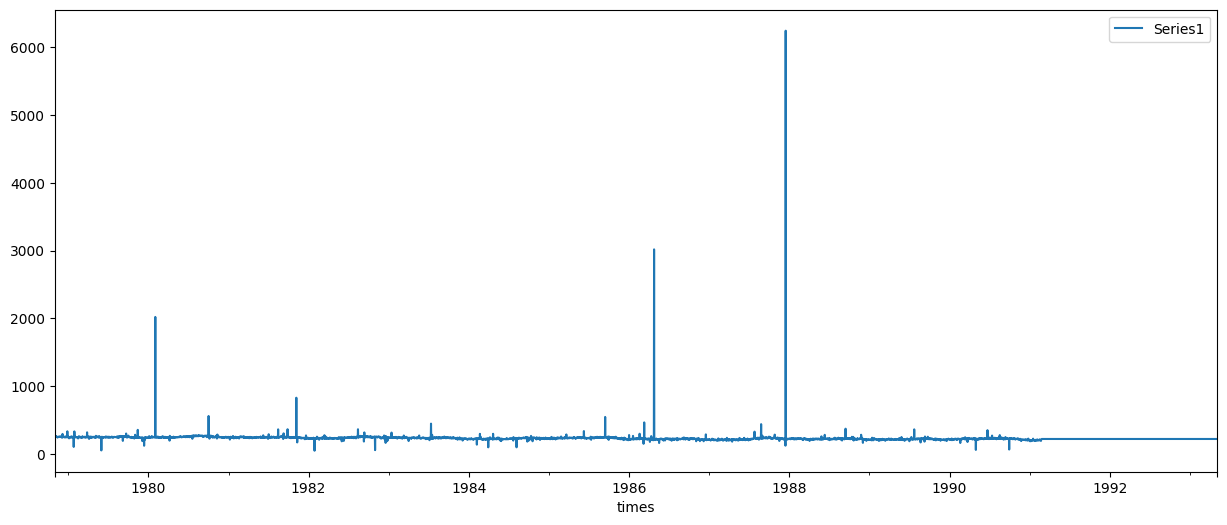

In [77]:
train_data2.plot(figsize=(15, 6))
plt.show()

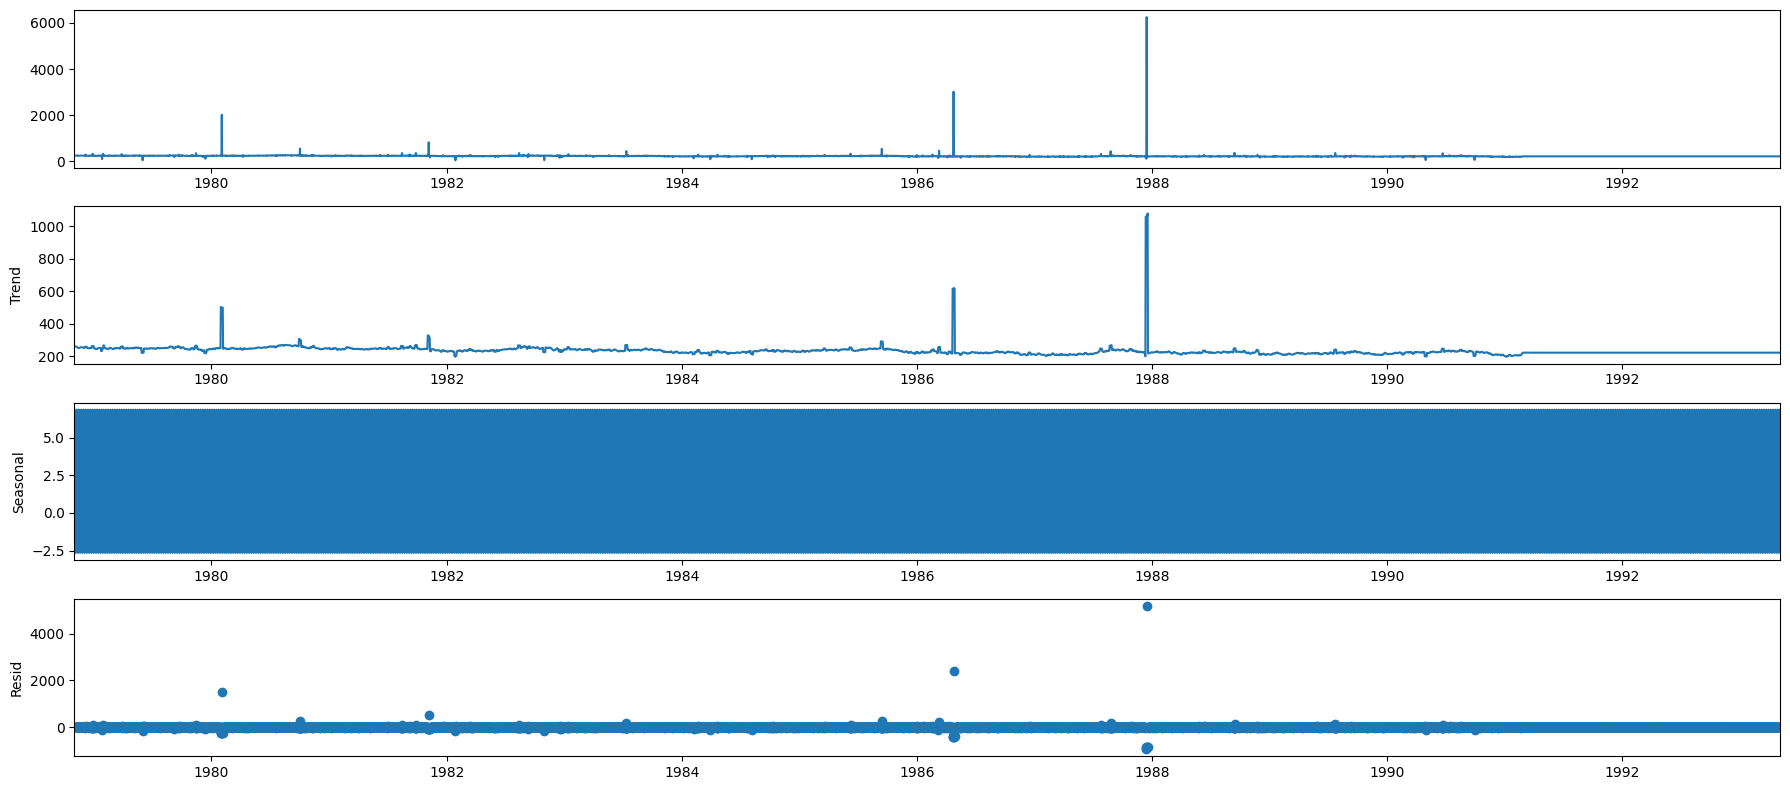

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train_data2, model='additive')
fig = decomposition.plot()
plt.show()

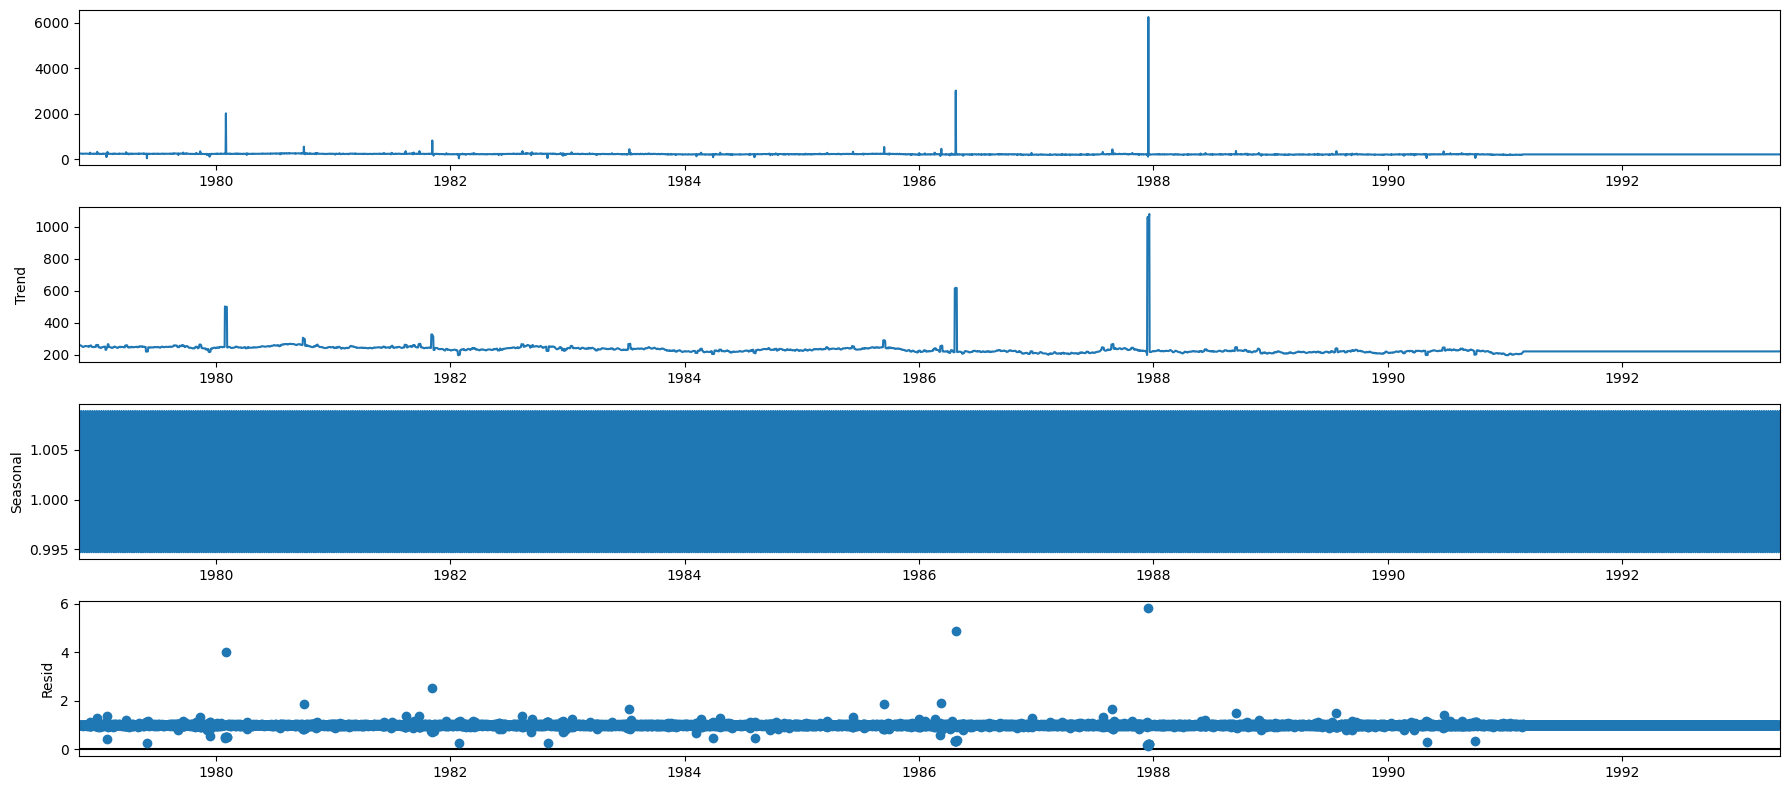

In [79]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(train_data2, model='multipicative')
fig = decomposition.plot()
plt.show()

### Forecasting with ARIMA

In [80]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [81]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_data2,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:73677.02632740464
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:70447.93379994403
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:66935.61761681006
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:63246.73039482483
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:66551.98918700268
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:63366.01596629253
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:65294.692378951615
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:63248.730340937924
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:70620.80882491078
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:68961.19353856728
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:66924.9013989457
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:63237.6301969452
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:66537.07994045367
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:63352.83852709265
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:65295.95513579873
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:63239.630156583095
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:67133.46783163534
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:66995.46616628424
ARIMA(0, 

In [85]:
mod = sm.tsa.statespace.SARIMAX(train_data2,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0100      0.051     -0.197      0.844      -0.109       0.089
ma.L1         -0.9960      0.005   -213.855      0.000      -1.005      -0.987
ar.S.L12       0.0005      0.026      0.021      0.983      -0.051       0.052
ma.S.L12      -1.0000      0.002   -610.625      0.000      -1.003      -0.997
sigma2      9261.3723   1.47e-07   6.31e+10      0.000    9261.372    9261.372


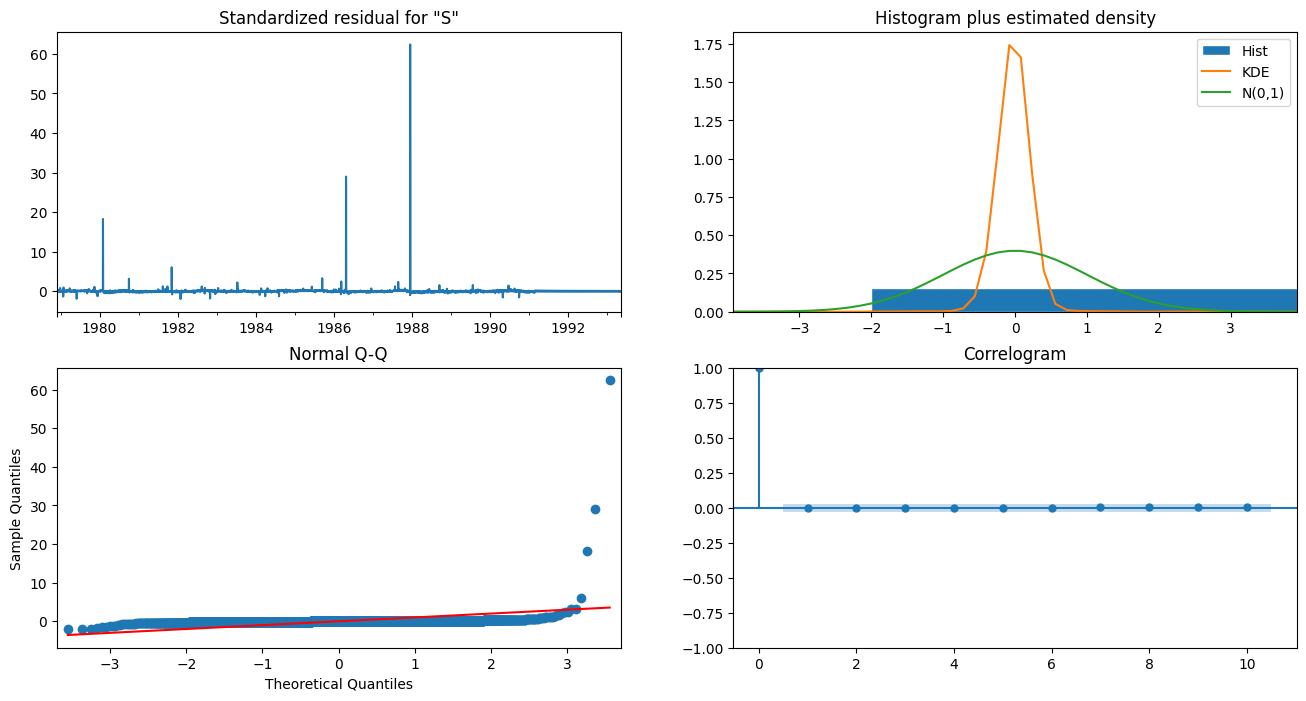

In [86]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

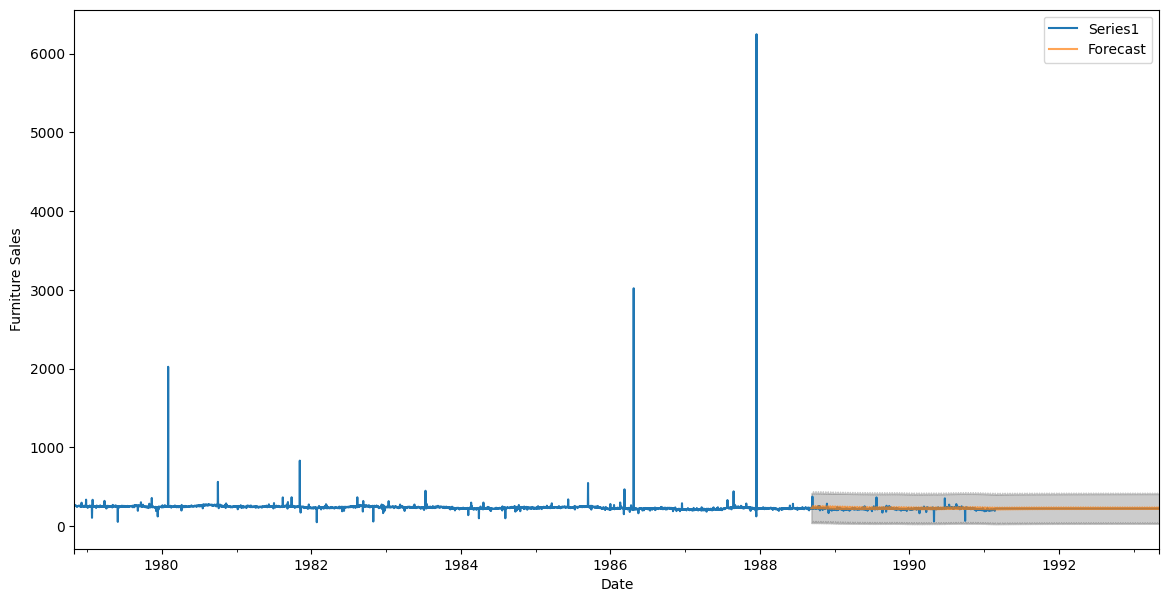

In [89]:
pred = results.get_prediction(start=pd.to_datetime('1988-09-09'), dynamic=False)
pred_ci = pred.conf_int()
ax = train_data2['1978':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()